In [5]:
from Scripts.Random_forest_nested import *
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cyto=pd.read_excel("Data/cyto_prediction.xlsx")

In [7]:
cyto=cyto.drop(columns=["Unnamed: 0",'lrti_1y.1'],axis=1)

In [8]:
cytokines=["crp_6mo","il_1β_6mo","il_8_6mo","il_6_6mo","tnf_α_6mo"]

In [9]:
corr_mat=cyto.corr(method="spearman").drop(cytokines,axis=0).loc[:,cytokines]

In [10]:
from scipy.stats import  spearmanr

In [14]:
corr,p=calculate_pvalues(cyto)

In [15]:
def calculate_pvalues(df):
    df = df._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose()
    pvalues.index=df.columns
    corr = dfcols.transpose()
    corr.index=df.columns
    for r in df.columns:
        for c in df.columns:
            if c == r:
                pvalues.loc[r,c]=1
            else:
                df_corr = df.loc[:,[r,c]].dropna()
                pvalues.loc[r,c] = spearmanr(df_corr.loc[:,r], df_corr.loc[:,c])[1]
                corr.loc[r,c] = spearmanr(df_corr.loc[:,r], df_corr.loc[:,c])[0]
    return df.corr(method="spearman"),pvalues

In [16]:
mask=p<0.05

In [17]:
p_shape=p.drop(cytokines,axis=0).loc[:,cytokines]

In [18]:
soft_max=mask.drop(cytokines,axis=0).loc[:,cytokines]

In [19]:
corr_shape=corr.drop(cytokines,axis=0).loc[:,cytokines]

In [20]:
columns=["CPR","$IL \ 1 \u03B2 $","IL 8","IL 6" ,"$TNF \ \u03B1 $" ]

In [21]:
index1=["Indoor $PM_{2.5}$","Indoor Formalhyde","Street $NO_2$","Street $PM_{2,5}$","Street $NO_x$" ,"Indoor $NO_x$","Indoor Acetald"," Indoor Actone","Indoor Black Carbon","Urban $NO_x$","Urban $NO_x$","Urban $PM_{2,5}$","Indoor Humidity","Fel d1","Der f1"]

In [22]:
index2=["Der p1","Can f1","Indoor temperature","Cotinine hair","Genetics","Gestational age",'Constrution year','Area',
       'Floor level',"Airport" ,"Forest","Moterway","Road","Farmland"]

In [23]:
dict1=dict(zip(corr_shape.columns,columns))
corr_shape=corr_shape.rename(columns=dict1).drop(["vocs_season_m6","coastline_m6","powerplant_m6"],axis=0)
dict1_index=dict(zip(corr_shape.index,index1+index2))


In [24]:
dict1_index

{'pm25_season_m6': 'Indoor $PM_{2.5}$',
 'form_season_m6': 'Indoor Formalhyde',
 'no2_str_m6': 'Street $NO_2$',
 'pm25_str_m6': 'Street $PM_{2,5}$',
 'nox_str_m6': 'Street $NO_x$',
 'nox_season_m6': 'Indoor $NO_x$',
 'acetald_season_m6': 'Indoor Acetald',
 'acetone_season_m6': ' Indoor Actone',
 'bc_season_m6': 'Indoor Black Carbon',
 'nox_urb_m6': 'Urban $NO_x$',
 'no2_urb_m6': 'Urban $NO_x$',
 'pm25_urb_m18': 'Urban $PM_{2,5}$',
 'humidity': 'Indoor Humidity',
 'fel_d_1_dust': 'Fel d1',
 'der_f_1_dust': 'Der f1',
 'der_p_1_dust': 'Der p1',
 'can_f_1_dust': 'Can f1',
 'temperature_bedroom': 'Indoor temperature',
 'cotinine_plasma': 'Cotinine hair',
 'lrti_1y': 'Genetics',
 'urti_1y': 'Gestational age',
 'rti_1y': 'Constrution year',
 'fever_1y': 'Area',
 'gi_1y': 'Floor level',
 'genetic_risk_score_asthma': 'Airport',
 'gestational_age': 'Forest',
 'neonatal_fef_05': 'Moterway',
 'constrution_year_m6': 'Road',
 'Area_m6': 'Farmland'}

In [25]:
corr_shape=corr_shape.rename(dict1_index)

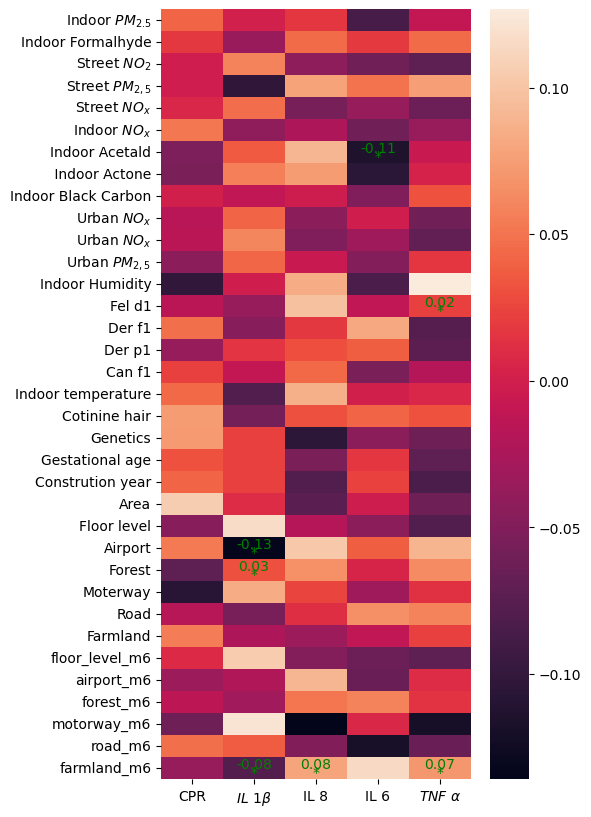

In [29]:
fig,ax=plt.subplots(1,1,figsize=(5,10))
g=sns.heatmap(corr_shape, fmt='g',ax=ax)
for i in range(corr_shape.shape[0]):
    for j in range(corr_shape.shape[1]):
        if p_shape.iloc[i, j]<0.05:
            corr = '{:.2f}'.format(corr_shape.iloc[i, j].round(2)),
            pval = p_shape.iloc[i, j].round(1)
            if p_shape.iloc[i, j]*p_shape.shape[0]<0.05:
                ax.text(j+0.5, i+0.3, corr[0], ha='center', va='center', fontsize=10, color='green')
                ax.text(j+0.5, i+0.7, "**", ha='center', va='center', fontsize=10, color='green')
            else:
                ax.text(j+0.5, i+0.3, corr[0], ha='center', va='center', fontsize=10, color='green')
                ax.text(j+0.5, i+0.7, "*", ha='center', va='center', fontsize=10, color='green')
            
fig.savefig("Plots/cytokine_responds_exposures.png",bbox_inches="tight")

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,10))
g=sns.heatmap(corr_shape, fmt='g',ax=ax)
for i in range(corr_shape.shape[0]):
    for j in range(corr_shape.shape[1]):
        if p_shape.iloc[i, j]<0.05:
            corr = '{:.2f}'.format(corr_shape.iloc[i, j].round(2)),
            pval = p_shape.iloc[i, j].round(1)
            if p_shape.iloc[i, j]*p_shape.shape[0]<0.05:
                ax.text(j+0.5, i+0.3, corr[0], ha='center', va='center', fontsize=10, color='green')
                ax.text(j+0.5, i+0.7, "**", ha='center', va='center', fontsize=10, color='green')
            else:
                ax.text(j+0.5, i+0.3, corr[0], ha='center', va='center', fontsize=10, color='green')
                ax.text(j+0.5, i+0.7, "*", ha='center', va='center', fontsize=10, color='green')
            
fig.savefig("Plots/cytokine_responds_exposures.png",bbox_inches="tight")

In [41]:
for i in range(corr_mat.shape[0]):
    for j, jx in enumerate(g.dendrogram_col.reordered_ind):
        text = g.ax_heatmap.text(j + 0.5,i + 0.3,"*" if df_raw.iloc[i, jx] else "",ha="center",va="center",color="black",size=20)
        text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.6,
                corr_raw.iloc[i, jx].round(2) ,
                ha="center",
                va="center",
                color="white",size=12
            )

AttributeError: 'Axes' object has no attribute 'dendrogram_col'

AttributeError: QuadMesh.set() got an unexpected keyword argument 'figsize'

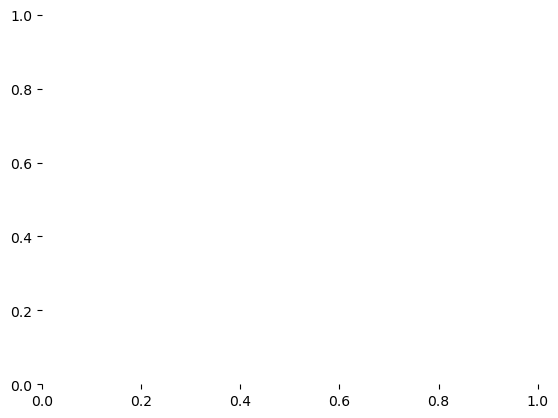

In [36]:
sns.heatmap(corr_mat,annot=soft_max,figsize=(10,10))

In [33]:
param_distributions = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(2, 10),"min_impurity_decrease":uniform(0.001, 0.03),"min_samples_leaf":[10,15]
,"max_features":[0.9,0.95],"max_samples":[0.9,0.95]}

In [34]:

performence,shap_values,feature_importance,parameter=nested_cross_validation_Regression(X,y,2,3,param_distributions)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
done % 0.16666666666666666
Fitting 3 folds for each of 10 candidates, totalling 30 fits
done % 0.3333333333333333
Fitting 3 folds for each of 10 candidates, totalling 30 fits
done % 0.5
Fitting 3 folds for each of 10 candidates, totalling 30 fits
done % 0.6666666666666666
Fitting 3 folds for each of 10 candidates, totalling 30 fits
done % 0.8333333333333334
Fitting 3 folds for each of 10 candidates, totalling 30 fits
done % 1.0


In [35]:
parameter

[{'max_depth': 6,
  'max_features': 0.9,
  'max_samples': 0.95,
  'min_impurity_decrease': 0.005679835610086079,
  'min_samples_leaf': 10,
  'n_estimators': 187},
 {'max_depth': 6,
  'max_features': 0.9,
  'max_samples': 0.9,
  'min_impurity_decrease': 0.0013979488347959958,
  'min_samples_leaf': 10,
  'n_estimators': 113},
 {'max_depth': 5,
  'max_features': 0.9,
  'max_samples': 0.95,
  'min_impurity_decrease': 0.018772437065861274,
  'min_samples_leaf': 10,
  'n_estimators': 234},
 {'max_depth': 9,
  'max_features': 0.95,
  'max_samples': 0.95,
  'min_impurity_decrease': 0.007370173320348284,
  'min_samples_leaf': 15,
  'n_estimators': 376},
 {'max_depth': 3,
  'max_features': 0.95,
  'max_samples': 0.9,
  'min_impurity_decrease': 0.0014789875666064258,
  'min_samples_leaf': 15,
  'n_estimators': 191},
 {'max_depth': 9,
  'max_features': 0.95,
  'max_samples': 0.95,
  'min_impurity_decrease': 0.007370173320348284,
  'min_samples_leaf': 15,
  'n_estimators': 376}]

In [36]:
performence

,R_squared_train,R_squared_test,root_mean_squared_error_train,root_mean_squared_error_test
0,0.401375,-0.079494,0.489304,0.582479
1,0.379561,-0.057457,0.465769,0.661915
2,0.269577,-0.050861,0.517891,0.635103
3,0.287655,-0.024250,0.521283,0.597077
4,0.272825,-0.109228,0.524742,0.631946
5,0.323397,-0.021257,0.490961,0.641288


In [37]:
feature_importance

acetald_season_m6            0.059465
acetone_season_m6            0.053249
bc_season_m6                 0.026818
can_f_1_dust                 0.035809
cotinine_plasma              0.033041
der_f_1_dust                 0.048733
der_p_1_dust                 0.034555
fel_d_1_dust                 0.037820
form_season_m6               0.037299
genetic_risk_score_asthma    0.051824
gestational_age              0.024476
humidity                     0.096997
lrti_1y                      0.005530
no2_str_m6                   0.037477
nox_season_m6                0.040059
nox_str_m6                   0.072482
pm25_season_m6               0.024014
pm25_str_m6                  0.077508
temperature_bedroom          0.057329
vocs_season_m6               0.145516
dtype: float64

/data/michaelf/miniconda3/lib/python3.10/site-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #5 for feature lrti_1y, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(


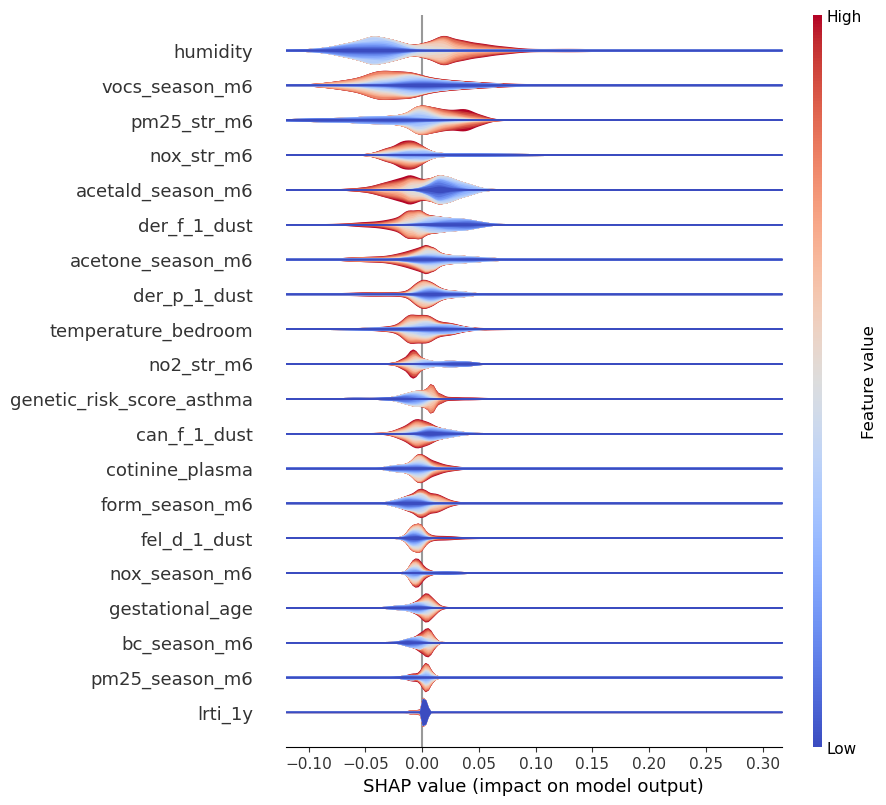

In [38]:
fig=shap.plots.violin(shap_values[:,:],X ,plot_type="layered_violin")
